## We apply the Time series analysis for the Air Passenger data

### Step-1 Import Libraries

In [478]:
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

### Step-2 Load and visualize the time series data

In [479]:
data = pd.read_csv('AirPassengers.csv', parse_dates=[0], index_col=0)
series = data['#Passengers']
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [480]:
series.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [481]:
data.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


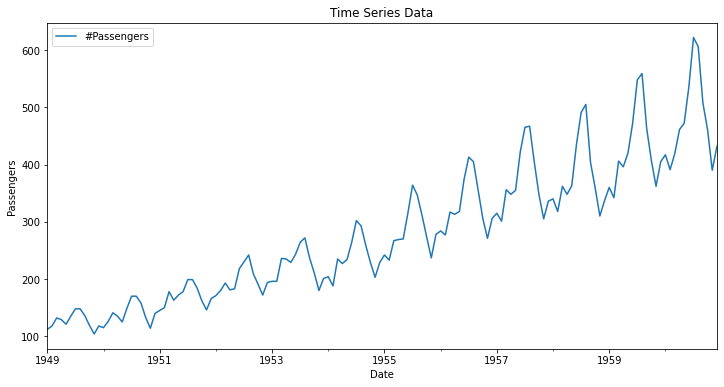

In [482]:
data.plot(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Time Series Data')
plt.show()

### Step-3 Check for stationarity

In [483]:
# Check for stationarity using the Augmented Dickey-Fuller test
def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic: ', result[0])
    print('p-value: ', result[1])
    if result[1] > 0.05:
        print("Data is non-stationary")
        return False
    else:
        print("Data is stationary")
        return True
    
is_stationary = check_stationarity(series)    

ADF Statistic:  0.8153688792060543
p-value:  0.9918802434376411
Data is non-stationary


### Step-4 Make the data stationary if necessary

In [484]:
# Function to difference the data to make it stationary
def differenced_data(series):
    diff_series = series.diff().dropna()
    return diff_series
if not is_stationary:
    while not is_stationary:
        series = differenced_data(series)
        is_stationary = check_stationarity(series)

ADF Statistic:  -2.8292668241700034
p-value:  0.054213290283824954
Data is non-stationary
ADF Statistic:  -16.384231542468488
p-value:  2.7328918500143186e-29
Data is stationary


<AxesSubplot:xlabel='Month'>

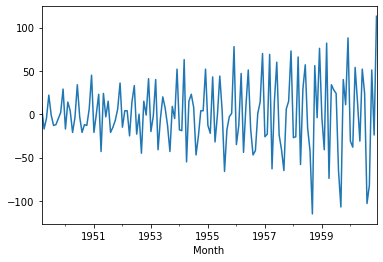

In [485]:
# Check if the differenced data has seasonality
series.plot()

### Step-5 Determine the AR component and MA component

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


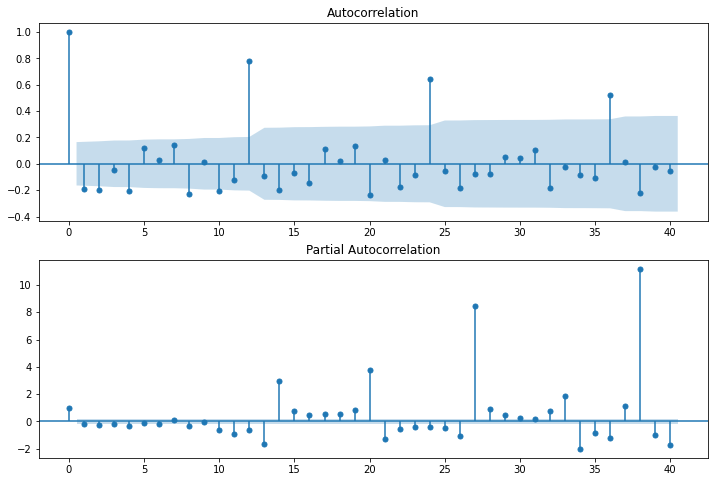

In [486]:
fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(211)
# acf is identify the q
fig = sm.graphics.tsa.plot_acf(series.dropna(), lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
# pacf is identify the p
fig = sm.graphics.tsa.plot_pacf(series.dropna(), lags = 40, ax = ax2)

In [487]:
data_df = pd.concat([data, series], axis = 1)

In [488]:
data_df.columns = ['Actual_value', 'Forecast_forecast']

In [489]:
data_df.head()

,Actual_value,Forecast_forecast
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,8.0
1949-04-01,129,-17.0
1949-05-01,121,-5.0


In [490]:
data.size

144

In [525]:
data_train = data[0:141]
data_test = data[141:144]

In [526]:
data_train.size

141

In [527]:
data_test.size

3

In [528]:
def auto_arima(data, max_p, max_d, max_q):
    best_aic = np.inf
    best_model = None
    best_order = None

    # Generate all possible combinations of p, d, q
    p_values = range(max_p + 1)
    d_values = range(max_d + 1)
    q_values = range(max_q + 1)
    orders = list(itertools.product(p_values, d_values, q_values))

    # Iterate over all combinations of p, d, q
    for order in orders:
        try:
            model = ARIMA(data, order=order)
            results = model.fit()
            aic = results.aic

            # Update the best model if the current AIC is lower
            if aic < best_aic:
                best_aic = aic
                best_model = results
                best_order = order
        except:
            continue

    return best_model, best_order

# Set maximum values for p, d, q
max_p = 4
max_d = 2
max_q = 4

# Run auto_arima function
best_model, best_order = auto_arima(data_train, max_p, max_d, max_q)

# Print the best model summary and order
# print("Best ARIMA Model:")
# print(best_model.summary())
print("Best ARIMA Order:", best_order)

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

Best ARIMA Order: (3, 1, 3)


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [534]:
data_model = ARIMA(data_train, order = (3, 1, 3))

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [535]:
data_model_fit = data_model.fit()

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [537]:
data_model_fit.aic

1306.6409643303361

In [538]:
data_forecast = data_model_fit.forecast(steps = 1)[0]

In [539]:
data_forecast

439.2143879858497

In [540]:
data_test

,#Passengers
Month,
1960-10-01,461
1960-11-01,390
1960-12-01,432
